# Employee Exit Surveys

## Backgroud

Staff feedback provides the companies with valuable information on the reasons why employees resign or retire. This information is used to inform attraction and retention initiatives and to improve work practices across the any company to ensure the company is considered an employer of choice.

<img src="https://fjwp.s3.amazonaws.com/blog/wp-content/uploads/2020/02/24145635/exit-interview-1024x512.png"/>

*Source*: [flexjobs](https://www.flexjobs.com/blog/post/how-to-handle-an-exit-interview/)

## Project and Data Overview

In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institude in Queensland, Australia.

The DETE Exit Survey was developed to effectively canvas the opinions and attitudes of departing employees to identify a wide range of operational, organizational and personal variables affecting the decision to leave.

We can find the DETE exit survey data [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). However, the orignial TAFE exit survey data is no longer available.
Therefore, we'll be using the modified versions of the original datasets to make them easier to work with, which includes changing the encoding to `UTF-8` (the original ones are encoded using `cp1252`).

## Data Dictionary

The data dictionary wasn't provided with the datasets. Therefore, we'll use our general knowledge to define the columns used in them.

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

## Project Goals

In this project, we'll analyze these datasets (DETE & TAFE) to find out the answers of the following questions:

- Are employees who only worked for the institues for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We'll combine the resluts for *both* surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers.


## Importing Libraries

We'll start by importing some useful libraries we need in the project.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

# Display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Enable the inline plotting
%matplotlib inline

## Load and Analysis Datasets

Next, we'll read in the `dete_survey.csv` and `tafe_survey.csv` datasets into pandas and explore them.

In [2]:
# Read datasets
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

Now that our datasets are loaded, we'll gather some basic information about both dataframes using `DataFrame.info()` and take a took at first few rows using `DataFrame.head()`.

### 1. DETE Survey Data

In [3]:
# Preview DETE dataset
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Interestingly, there are some important key points in the dataset that we need to consider:

- The dataset has **822 rows** and **56 columns**.
- The column names do not conform to the recommended python naming convention rather it appears inconsistent.
- 18 out of 56 columns are stored as bool dtypes, the only column `ID` is stored as int, and rest of the columns have object dtypes.
- 32 out of 56 columns have missing values. The column `Classification` has arount 44%, whereas, `Business Unit`, `Aboriginal`, `Torres Strait`, `South Sea`, `Disability`, and `NESB` have more than 50% missing values.
- Time columns like `Cease Date`, `DETE Start Date`, and `Role Start Date` are stored as string dtypes instead of datetime.

Let's look at descriptive statistics using `describe(include='all')`. The parameter *all* with `describe()` method allows all columns to include in the output.

In [4]:
dete_survey.describe(include='all')

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,822,822,822,817,455,822,126,817,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,808,735,816,788,817,815,810,813,812,813,811,767,746,792,768,814,812,816,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,25,51,46,15,8,9,14,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,73,98,324,161,135,54,434,800,742,788,733,761,806,765,794,795,788,760,754,785,710,794,605,735,605,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here `decribe(include='all)` method helps us further to get clarity and better understanding about our data:

- The most frequent reason why employees exit from DETE appears to be *age retirement*, as seen in the `SeparationType` column.
- Most employees are *61 or older* in the `Age` column which further solidify the reason why employees exit from DETE.
- `DETE Start Date` and `Role Start Date` columns have *Not Stated* as most frequent value and it should be referred as **NaN**.
- Columns like `Aboriginal`, `Torres Strait`, `South Sea`, `Disability`, and `NESB` have one unique value which is **Yes** and all other values are stored as **NaN**, rather they should be stored as **No**. This is the reason why these columns have such a high percentage of missing values.
- The columns from `Professional Development` to `Health & Safety` have *A* as most common values. This seems quite unusual as 'A' doesn't seem to represent anything. We'll explore these columns further.

To investigate the unusual entries like **'A'** in the columns from `Professional Development` to `Health & Safety`, we'll have to find all the unique values and count them. For this purpose, first we'll use pandas `DataFrame.apply()` on our target columns and then we'll count unique values using `lambda` function.

In [5]:
dete_survey.loc[:, 'Professional Development':'Health & Safety'].apply(lambda x: x.value_counts())

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety
A,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386
D,60,83,112,77,61,107,95,77,37,34,59,65,108,78,77,76,52,45,60,105,50
M,15,24,13,14,15,12,14,12,11,13,11,22,17,15,13,8,10,11,10,33,28
N,103,230,158,160,99,116,168,120,95,95,94,141,183,138,179,129,116,120,130,225,153
SA,184,100,121,115,148,162,124,179,243,244,228,157,130,156,149,144,177,165,162,78,141
SD,33,56,77,65,27,59,67,76,25,31,47,37,62,57,57,58,57,39,50,72,35


**Observation**

- In our target columns, there are 6 unique values are used as likert scale: `SA`, `M`, `A`, `N`, `D`, `SD`.
- It is hard to interpret what the `M` means in these columns. Since the data source has not provided the description, we'll assume that it is likely to be abbreviated as **Missing** (i.e. the individual did not select an option). 
- The entries in these columns abbreviate as: **Strongly Agree (SA)**, **Agree (A)**, **Neutral (N)**, **Disagree (D)**, and **Strongly Disagree (SD)**.
- The most common values are `A` in every column.

### 2. TAFE Survey Data

In [6]:
# Preview TAFE dataset
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

We notice that the presentation of the `tafe_survey` dataset is a lot more messier than the `dete_survey` dataset in contrast, we makes it harder to analyze the data. We need to pay careful attention to extract the key points from this dataset:

- The columns do not follow Python naming convention, infact, the column names are too long and wordly.
- The dataset consists of **702 rows** and **72 columns**.
- 70 out of 72 columns are stored as string and only two columns (`Record ID` and `CESSATION YEAR`) are stored as float.
- Missing values in the **Contributing Factors** columns is 38% altogether, and the column `Main Factor. Which of these was the main factor for leaving?` has the highest about 84% of missing values in the whole dataset.
- Although these columns are presented differently, some of the columns are similar to the DETE dataset. Such as, `CESSATION YEAR`, `Reason for ceasing employment`, `Gender`, `CurrentAge`, and `EmploymentType`.

Let's dig deeper and gather some more insights with the help of `describe(include='all')`.

In [7]:
tafe_survey.describe(include='all')

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

There are various issues in the data that are important to highligth:

- The entries recorded in `Contributing Factors` columns have `-`. This could be indicating that no answer was provided at the time the survey was administered.
- The most frequent entry in the `Main Factor. Which of these was the main factor for leaving?` column is *Dissatisfaction with Institute* which appears *23* times only. We have to consider that this column has over *83%* of missing values as well.
- `Reason for ceasing employment` shows the reason why most employees leave the work and that is *Resignation*.
- Columns like `InstituteViews` and `WorkUnitViews` have recorded *Agree* most of the time. Similiar to *DETE* data.
- The `CurrentAge. Current Age` column has several age bins. Most of them are 56 years or older.

**Brief Description of the Oberservations**

From our initial work, we can first make the following observations:

- The `dete_survey` dataframe contains `Not Stated` values that indicate values are missing, but they aren't represented as `NaN`.
- Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

Let's take care of these issues next.

## Data Cleaning

To start, we'll handle the first two issues. We can use the `pd.read_csv()` function to specify values that should be represented as `NaN`. We'll use this function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis.

### 1. Specify 'Not_Stated' as 'NaN'

We read the `dete_survey.csv` file into pandas again, but this time read the `Not Stated` values in as `NaN`:

- To read `Not Stated` in as `NaN`, we'll set the `na_values` parameter to `Not Stated` in the `pd.read_csv()` funtion.

In [8]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### 2. Drop Unwanted Columns

Next, let's drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with:

- We'll use `DataFrame.drop()` method to drop the columns from `Professional Development` (**column 28**) to `Health & Safety` (**column 48**) in `dete_survey`. 
    - Then we'll assign the result to `dete_survey_updated`.

In [9]:
dete_unwanted_cols = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(dete_unwanted_cols, axis=1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Now, we'll repeat the same steps for `tafe_survey`:

- Drop the columns from `Main Factor. Which of these was the main factor for leaving?` (**column 17**) to `Workplace. Topic:Would you recommend the Institute as an employer to others?` (**column 65**).
    - Assign the result to `tafe_survey_updated`.

In [10]:
tafe_unwanted_cols = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(tafe_unwanted_cols, axis=1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Let's varify the changes we have made after dropping the columns in both datasets. 

In [11]:
print(f'Number of columns in DETE dataset\nbefore cleaning: {dete_survey.shape[1]}\tafter cleaning: {dete_survey_updated.shape[1]}')
print('-'*40)
print(f'Number of columns TAFE dataset\nbefore cleaning: {tafe_survey.shape[1]}\tafter cleaning: {tafe_survey_updated.shape[1]}')

Number of columns in DETE dataset
before cleaning: 56	after cleaning: 35
----------------------------------------
Number of columns TAFE dataset
before cleaning: 72	after cleaning: 23


We have made the changes now let's turn our focus to the column names.

### 3. Change Column Names

Each dataframe contains many of the same columns, but the columns are different. Below are some of the columns we'd like to use for our final analysis:

| dete_survey | tafe_survey | Definition |
| :---: | :---: | :---: |
| ID | Record ID | An id used to identify the participant of the survey |
| SeparationType | Reason for ceasing
employment | The reason why the participant's employment ended |
| Cease Date | CESSATION YEAR | The year or month the participant's employment ended |
| DETE Start Date | | The year the participant began employment with the DETE |
| | LengthofServiceOverall.
Overall Length of Service
at Institute (in years) | The length of the person's employment (in years) |
| Age | CurrentAge.
Current Age | The age of the participant |
| Gender | Gender.
What is your Gender? | The gender of the participant |

Because we eventually want to combine them, we'll have to standardize the column names. Let's begin with `dete_survey_updated` dataframe using the following criteria to update the column names:

- Use the `DataFrame.columns` attribute along with vectorized string methods to update all of the columns at once.
- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores (`_`).

In [12]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace('\s+', '_', regex=True)
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Next, we'll update the columns in the `tafe_survey_updated` using `DataFrame.rename()` method. For this purpose, we'll take the following steps:

- Only change the names of few columns for now - we'll handle the rest of the columns later.
- New columns names are similar to the columns in `dete_survey_updated` dataframe.

In [13]:
cols_to_rename = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_survey_updated.rename(columns=cols_to_rename, inplace=True)

Let's use the `DataFrame.head()` method to look at the current state of the `dete_survey_updated` and `tafe_survey_updated` dataframes and make sure the changes have taken place.

In [14]:
# View 'dete_survey_updated' dataframe
dete_survey_updated.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [15]:
# View 'tafe_survey_updated' dataframe
tafe_survey_updated.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


We have renamed the columns that we'll use in our analysis. Next, let's remove more of the data we don't need.

### 4. Filter the Data

Recall that one of our end goals is to answer the following question:
- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types.

In [16]:
dfs = [dete_survey_updated, tafe_survey_updated]
df_names = ['DETE Survey Data', 'Tafe Survey Data']

for df, df_name in zip(dfs, df_names):
    print('\033[1m' + df_name + '\033[0;0m')
    print(df['separationtype'].value_counts(dropna=False), '\n')

DETE Survey Data
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64 

Tafe Survey Data
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64 



We'll only analyze survey respondents who *resigned*, so their separation type contains the string `Resignation`. Note above that we can see multiple separation types with the string `Resignation`, such as:

- Resignation
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

We'll have to account for each of these variations so we don't unintentionally drop data.

Also, we'll use the `DataFrame.copy()` method on the result to avoid the SettingWithCopy Warning.

In [17]:
# Select only those entries that have a 'Resignation' separation type
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()

# str.contains method can not mask non-boolean values
# therefore, specifying 'na' to 'False' in the parameter
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation', na=False)].copy()

# Display unique values in 'dete_resignations' and 'tafe_resignations'
for df, df_name in zip([dete_resignations, tafe_resignations], df_names):
    print('\033[1m' + df_name + '\033[0;0m')
    print(df['separationtype'].value_counts(), '\n')

DETE Survey Data
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64 

Tafe Survey Data
Resignation    340
Name: separationtype, dtype: int64 



Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies.

### 5. Verify Date Columns

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. We'll check the date for the following issues:

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

Let's view the unique values in the `cease_date` column first.

In [18]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

The values in the `cease_date` column are inconsistent. Some dates are stored as just years in YYYY format, whereas, others are in MM/YYYY format.

We'll deal with this issue by extracting only year values from the column and convert the data type to float (the year values stored in other columns are float as well).

In [19]:
# Create regex to match 4 digits of year
pattern = r'(\d{4})'

# Extract and assign only year from 'cease_date' and convert the type to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern).astype('float')

Let's count the unique values again in the `cease_date` column.

In [20]:
# View unique values in 'cease_date' with index in ascending order
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

We can see the result of these unique values is uniform. Now we'll explore the `dete_start_date` column in `dete_resignations`.

In [21]:
# View unique values in 'dete_start_date'
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

There is no inconsistent pattern in the column and the values are correctly formated.

Lastly, find the unique values in `cease_date` column of `tafe_resignations` dataframe.

In [22]:
# View unique values with index in ascending order
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

The values in this column look uniform as well. Now, we'll move on to visualize the values of `dete_start_date` and `cease_date` columns with a `boxplot` to identify any values that look wrong.

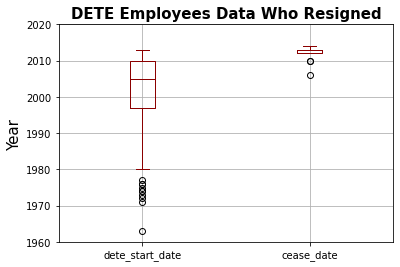

In [23]:
dete_resignations.boxplot(column=['dete_start_date', 'cease_date'], color='darkred')
plt.title('DETE Employees Data Who Resigned', fontsize=15, fontweight='bold')
plt.ylabel('Year', fontsize=15)
plt.ylim(1960, 2020)
plt.show()

We gain the following insights from the figure above:

- There aren't any major issues with the years as we can see these is no year beyond the current of `cease_date` (i.e. 2014).
- Large number of employees started working from late `1990's` to `2010`.
- High percentage of the employees who resigned from the work are in the `2010 - 2014` year bracket.

Since we do not have the information about *job starting year* in the `tafe_resignations`, it won't really be helpful to make visualization on this dataframe.

### 6. Calculate Years of Service

Now that we've verified that there aren't any major issues with years in the `dete_resignations` dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

We have noticed that the `tafe_resignations` dateframe already contains a column `institute_service` which refers to years of *service* of an employee. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`. We can create the `institute_service` column by subtracting the `dete_start_date` from the `cease_date`.

In [24]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

Let's group the years from `institute_service` column into different bins. To create binning we'll have to make a custom function `year_group()` because for most of the groups we want to include both **left** and **right** edges, therefore, [pd.cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) won't be useful.

We'll group the years in a same way as they are in the `institute_service` column of `tafe_resignations` dataframe:

- **Less than 1 year** - service less than a year
- **1-2** - service length between 1 to 2 years
- **3-4** - service length between 3 to 4 years
- **5-6** - service length between 5 to 6 years
- **7-10** - service length between 7 to 10 years
- **11-20** - service length between 11 to 20 years
- **More than 20 years** - service length more than 20 years

In [25]:
def year_group(n):
    """
    Perform operation on each element of a column to group them.
        
        Param:
            n (float/int): A value in the column.
            
        Returns:
            A category representing the respective bin for a given value n.
    """
    if n < 1:
        return 'Less than 1 year'
    elif 1 <= n <= 2:
        return '1-2'
    elif 3 <= n <= 4:
        return '3-4'
    elif 5 <= n <= 6:
        return '5-6'
    elif 7 <= n <= 10:
        return '7-10'
    elif 11 <= n <= 20:
        return '11-20'
    else:
        return 'More than 20 years'

Next, we'll call our customize function on the `institute_service` column using Series method `apply()` and assign the result to a new column `institute_service_year_group`. Note: we'll have to make sure the our function doesn't not compute `NaN` values and that's what the `lambda` function is doing in the code cell below.

In [26]:
dete_resignations['institute_service_year_group'] = dete_resignations['institute_service'].apply(lambda x: year_group(x) if pd.notnull(x) else x)

Let's calculate the frequency of `institute_service_year_group` column in `dete_resignations` dateframe.

In [27]:
dete_resignations['institute_service_year_group'].value_counts(dropna=False).sort_index(ascending=False)

More than 20 years    43
Less than 1 year      20
7-10                  41
5-6                   40
3-4                   36
11-20                 57
1-2                   36
NaN                   38
Name: institute_service_year_group, dtype: int64

We have 38 missing entries and the rest of the result shows that 173 employees (about 56%) resigned from the work at DETE in their first 10 years. Whereas 57 employees (18%) made it up to 20 years before leaving their job, 13% of employees resigned after 20 years of service.

Now we'll move on to TAFE and explore the frequency of `institute_service` column.

In [28]:
tafe_resignations['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

Despite having 50 missing entries, the numbers are staggering in the TAFE data. There are 74% of employees (254 out of 340) resigned within 10 years. Only 10% of employees resigned after 10 years of their service.

### 7. Identify Dissatisfied Columns

Next, we'll identify employees who resigned because of dissatisfaction. Below are the columns we'll use to categorize employees as 'dissatisfied' from each dataframe.

1. tafe_resignations:

- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`

2. dete_resignations:

- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

If the employee indicated any of the factors above caused them to resign, we'll make them as `dissatisfied` in a new column. After our changes, the new `dissatisfied` column will contain just the following values:

- `True`: indicates a person resigned because they were dissatisfied with the job
- `False`: indicates a person resigned because of a reason other than dissatisfaction with the job
- `NaN`: indicates the value is missing

Before that let's view the unique values in the `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` columns in the `tafe_resignations` dataframe.

In [29]:
# View the values in the 'dissatisfied columns' of tafe_resignations
tafe_dissatisfied_cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

for col in tafe_dissatisfied_cols:
    print('-'*60)
    print(tafe_resignations[col].value_counts(dropna=False))
    print('-'*60)

------------------------------------------------------------
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
------------------------------------------------------------
------------------------------------------------------------
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64
------------------------------------------------------------


We'll now create a function `update_vals` to update the values as we have discussed above.

In [30]:
def update_vals(val):
    """
    Take the value of a Series and update it to bool or np.nan
       
       Params:
           val (str, NaN, or -): The value to be updated
           
       Returns:
           bool or NaN
    """
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

Next, we'll use the `DataFrame.applymap()` method to apply the `update_vals` function to update the values of our columns of interest in the `tafe_resignations` dataframe

In [31]:
tafe_resignations[tafe_dissatisfied_cols] = tafe_resignations[tafe_dissatisfied_cols].applymap(update_vals)

# View the changes in 'tafe_dissatisfied_cols'
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,False,False,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,False,False,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,False,False,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,False,False,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,False,False,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


The changes have been made successfully. Now, we'll use the `df.any()` method as described above to create a `dissatisfied` column in the `tafe_resignations` dataframe.

In [32]:
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dissatisfied_cols].any(axis=1, skipna=False)

To avoid SettingWithCopy Warning let's make a copy of the `tafe_resignations` using `df.copy()` and then view the results. We'll assign the new results to `tafe_resignations_up`.

In [33]:
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,False,False,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,False,False,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,False,False,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,False,False,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,False,False,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


Now that we have made the changes in the `tafe_resignations` dataframe, we'll follow the same steps for `dete_resignations` as well:

- View the unique values in our columns of interest.
- The values in these columns are already in the correct format, so we'll simply use the `df.any()` method to create new column `dissatisfied`.
- Use the `df.copy()` method to create a copy and assign results to `dete_resignations_up`.

In [34]:
# View value in values in our targeted columns of `dete_resignations`
dete_dissatisfied_cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
                          'physical_work_environment', 'lack_of_recognition',
                          'lack_of_job_security', 'work_location',
                          'employment_conditions', 'work_life_balance',
                          'workload']

for col in dete_dissatisfied_cols:
    print('-'*60)
    print(dete_resignations[col].value_counts(dropna=False))
    print('-'*60)

------------------------------------------------------------
False    270
True      41
Name: job_dissatisfaction, dtype: int64
------------------------------------------------------------
------------------------------------------------------------
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64
------------------------------------------------------------
------------------------------------------------------------
False    305
True       6
Name: physical_work_environment, dtype: int64
------------------------------------------------------------
------------------------------------------------------------
False    278
True      33
Name: lack_of_recognition, dtype: int64
------------------------------------------------------------
------------------------------------------------------------
False    297
True      14
Name: lack_of_job_security, dtype: int64
------------------------------------------------------------
-------------------------------------

We notice that there is no missing values in any of these columns. We'll continue to completed rest of the steps.

In [35]:
# Create new `dissatisfied` column in the `dete_resignations`
dete_resignations['dissatisfied'] = dete_resignations[dete_dissatisfied_cols].any(axis=1, skipna=False)

In [36]:
# Create a copy of `dete_resignations` and assign it to `dete_resignations_up`
dete_resignations_up = dete_resignations.copy()

# View the result
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,institute_service_year_group,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,7-10,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,11-20,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,3-4,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,11-20,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,3-4,False


### 8. Combine Both DataFrames

To recap, we've accomplished the following:

- Renamed our columns
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Created a new `institute_service` column
- Cleaned the `Contributing Factors` columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the `institute_service` column, so for this purpose we'll take the following steps:

- Add a column `institute` to each dataframe that will allow us to easily distinguish between the two.
- Combine the dataframes and assign the result to `combined` variable.
- Drop columns that have less than 500 non null values using `DataFrame.dropna()` and assign the result to `combined_updated` variable.

Let's do this next to get the data into a form that's easy to aggregate.

In [37]:
# Add column 'institute' to 'dete_resignations_up'
# that contains the value 'DETE'
dete_resignations_up['institute'] = 'DETE'

# View result
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,institute_service_year_group,dissatisfied,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,7-10,False,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,11-20,True,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,3-4,False,DETE
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,11-20,True,DETE
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,3-4,False,DETE


In [38]:
# Add column 'institute' to 'tafe_resignations_up'
# that contains the value 'TAFE'
tafe_resignations_up['institute'] = 'TAFE'

# View result
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,False,False,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,False,False,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,False,False,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,False,False,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,False,False,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [39]:
# Combine both dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# View result
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,institute_service_year_group,dissatisfied,institute,Institute,WorkArea,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,7-10,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,11-20,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,3-4,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,11-20,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,3-4,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# View columns to check the number of non null values
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 54 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [41]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(axis='columns', thresh=500)

# Check the updated dataframe for confirmation
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(2), object(7)
memory usage: 46.5+ KB


In [42]:
# View the dataframe
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE


We have combined our dataframes and drop columns with less than 500 columns.

### 9. Categorize the Institute Service Column

We're almost at a place where we can perform some kind of analysis but first we'll have to clean up the `institute_service` column. The column is a bit tricky to clean because it currently contains values in a couple different forms:

In [43]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


To analyze the data, we'll convert these numbers into categories. We'll base our analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

To continue, we'll have to apply vectorized string methods on the `institute_service` and modify the values to a required format. We'll take the following steps to achieve the desire results:

1. Convert **less than 1 year** to **1** using 'replace()'
2. Convert **More than 20 years** to **21** using 'replace()'
3. Convert **.** the decimal point to **-** using 'replace()'
4. Split values from **-** using 'split()' and select the **0th** value using 'get()' method
5. Convert the *data-type* of `institute_service` from **object** to **float**

In [44]:
# Make copy of the 'combined_updated' dataframe to avoid SettingWithCopyWarning
combined_updated2 = combined_updated.copy()

In [45]:
# Replace the values into the required format
combined_updated2['institute_service'] = (combined_updated2['institute_service'].astype('str').str.replace('Less than 1 year', '1', regex=True)
                                                                                              .str.replace('More than 20 years', '21', regex=True)
                                                                                              .str.replace('.', '-', regex=True))

# Split the values to get the 0th element
# and convert data-type to float
combined_updated2['institute_service'] = combined_updated2['institute_service'].str.split('-').str.get(0).astype('float')

In [46]:
# View the values after performing vectorized methods
combined_updated2['institute_service'].value_counts(dropna=False).sort_index()

0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0      7
21.0     13
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
NaN      88
Name: institute_service, dtype: int64

We have made the changes, now we'll create a `years_cat` function to convert the values in `institute_service` into categories:

- **New**: Less than 3 years at a company
- **Experiened**: 3-6 years at a company
- **Established**: 7-10 years at a company
- **Veteran**: 11 or more years at a company

Let's categorize the values in the `institute_service` column using the definitions above.

In [47]:
def years_cat(val):
    """
    Covert years of service into categories.
    
        Params:
            val (float or NaN): The value to be converted
        
        Returns:
            NaN or category of the value
    """
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New (0-3)'
    elif 3 <= val <= 6:
        return 'Experienced (3-6)'
    elif 7 <= val <= 10:
        return 'Established (7-10)'
    else:
        return 'Veteran (11+)'
    
combined_updated2['service_cat'] = combined_updated2['institute_service'].apply(years_cat)

# Check the unique values
combined_updated2['service_cat'].value_counts(dropna=False)

New (0-3)             193
Experienced (3-6)     172
Veteran (11+)         136
NaN                    88
Established (7-10)     62
Name: service_cat, dtype: int64

We have successfully cleaned and categorized the `institute_service` column. We have stored the categorized data in the new column `service_cat`. Now we'll move on the our next column of interest (`age`).

### 10. Clean and Categorize the Age Column

Now we'll deal with the next column of interest `age` that is required for our analysis. Let's check the values of this column.

In [48]:
combined_updated2['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

As we can see the values represented in the `age` column are irregular. To clean the data we'll use string vectorized method `str.extract()` to retrieve first value from each entry. For instance, extract **26** from **26-30** or **20** from **20 or younger** and so on. Then we'll convert the data-type into *float*.

In [49]:
# Extract only first digits from each entry
combined_updated2['age'] = combined_updated2['age'].astype('str').str.extract(r'(\d+)').astype('float')

# View the values
combined_updated2['age'].value_counts()

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

We have the data in the desired format. We can now convert the age of the employees into categories. Below is a list of different categories we'll use to represent the age:

- **Teen**: 20 or younger
- **Young**: 21-40 years old
- **Adults**: 41-60 years old
- **Senior**: 61 or older

In order to perform this task we'll create a `age_categories()` function which takes the value from `age` column and categorize accordingly. We'll store the age-categories in the new column `age_cat`.

In [50]:
def age_categories(val):
    if pd.isnull(val):
        return np.nan
    elif val <= 20:
        return 'Teen (20 or less)'
    elif 21 <= val <= 40:
        return 'Young (21-40)'
    elif 41 <= val <= 60:
        return 'Adults (41-60)'
    else:
        return 'Senior (61 or more)'

In [51]:
combined_updated2['age_cat'] = combined_updated2['age'].apply(age_categories)
combined_updated2['age_cat'].value_counts(dropna=False)

Adults (41-60)         300
Young (21-40)          263
NaN                     55
Senior (61 or more)     23
Teen (20 or less)       10
Name: age_cat, dtype: int64

We have done all the data cleaning for our analysis. Next, we'll deal with the missing values.

### 11. Dealing with Missing Values

Our next step is to check the missing values in the data and how we can handle them. First, let's find the number of missing values in each column of `combined_updated2` dataframe.

In [52]:
# Find the number of missing values in each column
combined_updated2.isnull().sum()

id                    0
separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          0
institute             0
service_cat          88
age_cat              55
dtype: int64

We have missing values in almost every column but for now our focus will only be on the `service_cat` and `age_cat` columns.

### Handling service_cat Column

Around 15% of the data in the `service_cat` column is missing. Therefore, we can't simply replace the missing values with the most frequent values. Instead, we'll have to find a better way. One of the things we can do is use the values in the `age_cat` column and fill the missing values in `service_cat` accordingly.

Before tackling this challenge, let's see the rows with missing data in `service_cat` and visualize their representation.

In [53]:
# Find rows with missing values in 'service_cat'
combined_updated2[combined_updated2['service_cat'].isnull()]

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,age_cat
7,1.700000e+01,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61.0,NaN,True,DETE,NaN,Senior (61 or more)
17,4.000000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Female,21.0,NaN,True,DETE,NaN,Young (21-40)
37,1.070000e+02,Resignation-Other reasons,2012.0,Teacher Aide,Temporary Part-time,Female,46.0,NaN,True,DETE,NaN,Adults (41-60)
50,1.410000e+02,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,51.0,NaN,False,DETE,NaN,Adults (41-60)
62,1.970000e+02,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Female,46.0,NaN,False,DETE,NaN,Adults (41-60)
...,...,...,...,...,...,...,...,...,...,...,...,...
625,6.350055e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN,NaN
627,6.350124e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,True,TAFE,NaN,NaN
642,6.350496e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN,NaN
645,6.350652e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN,NaN


We can notice that more rows have **NaN** in both `service_cat` and `age_cat`; we can count these columns having the exact missing values together.

In [54]:
# Find rows of missing values in both 'service_cat' and 'age_cat' columns
missing_serv_age_cat = combined_updated2[(combined_updated2['service_cat'].isnull()) & (combined_updated2['age_cat'].isnull())]

# Total number of rows with missing values
missing_serv_age_cat.shape[0]

53

There are 53 rows out of 88 that have missing data in both the `service_cat` and `age_cat` columns. These rows won't be helpful for our analysis. It is safe to drop them.

In [55]:
# Drop the rows that have missing values in both 'service_cat' and 'age_cat' columns
combined_updated2.drop(labels=missing_serv_age_cat.index, inplace=True)

# Reset the index of 'combined_updated2' dataframe
combined_updated2.reset_index(drop=True, inplace=True)

Moving on we'll now count the of missing data in `service_cat` based on each institue (*DETE or TAFE*).

In [56]:
# Count the values of 'service_cat' in the DETE institute
combined_updated2[combined_updated2['institute']=='DETE']['service_cat'].value_counts(dropna=False)

Veteran (11+)         100
Experienced (3-6)      76
New (0-3)              56
Established (7-10)     41
NaN                    35
Name: service_cat, dtype: int64

In [57]:
# Count the values of 'service_cat' in the TAFE institute
combined_updated2[combined_updated2['institute']=='TAFE']['service_cat'].value_counts(dropna=False)

New (0-3)             137
Experienced (3-6)      96
Veteran (11+)          36
Established (7-10)     21
Name: service_cat, dtype: int64

We only have missing service categories in the DETE institute. So we'll take the following steps to solve this issue:

1. Select a subset of `combined_updated2` dataframe based on *DETE* institute according to each *age category* (e.g. DETE & Teen, DETE & Young, and so on).
2. View and count the frequent values in each of the subset dataframes.
3. Fill the missing values `service_cat` with the most frequent values respectively.

Let's begin with the **step one** which is to make subsets of `combined_updated2` dataframes separately.

In [58]:
# Select data that has 'DETE' institute and 'Teen' as age category
dete_teen = combined_updated2[(combined_updated2['institute']=='DETE') & (combined_updated2['age_cat']=='Teen (20 or less)')]

# Select data that has 'DETE' institute and 'Young' as age category
dete_young = combined_updated2[(combined_updated2['institute']=='DETE') & (combined_updated2['age_cat']=='Young (21-40)')]

# Select data that has 'DETE' institute and 'Adults' as age category
dete_adults = combined_updated2[(combined_updated2['institute']=='DETE') & (combined_updated2['age_cat']=='Adults (41-60)')]

# Select data that has 'DETE' institute and 'Senior' as age category
dete_senior = combined_updated2[(combined_updated2['institute']=='DETE') & (combined_updated2['age_cat']=='Senior (61 or more)')]

We have extracted the required data. In the **step two** we'll count the distribution across each age category.

In [59]:
# View the results of frequent values accordingly to age-categories
print(f"\033[1mDETE Age Category: Teen\033[0;0m\n{dete_teen['service_cat'].value_counts(dropna=False)}\n")
print(f"\033[1mDETE Age Category: Young\033[0;0m\n{dete_young['service_cat'].value_counts(dropna=False)}\n")
print(f"\033[1mDETE Age Category: Adults\033[0;0m\n{dete_adults['service_cat'].value_counts(dropna=False)}\n")
print(f"\033[1mDETE Age Category: Senior\033[0;0m\n{dete_senior['service_cat'].value_counts(dropna=False)}")

DETE Age Category: Teen
New (0-3)    1
Name: service_cat, dtype: int64

DETE Age Category: Young
Experienced (3-6)     49
New (0-3)             38
Established (7-10)    22
Veteran (11+)         13
NaN                   12
Name: service_cat, dtype: int64

DETE Age Category: Adults
Veteran (11+)         72
Experienced (3-6)     25
NaN                   18
Established (7-10)    17
New (0-3)             16
Name: service_cat, dtype: int64

DETE Age Category: Senior
Veteran (11+)         14
NaN                    5
Experienced (3-6)      2
Established (7-10)     2
Name: service_cat, dtype: int64


Apart from `DETE Teen`, all other subsets have missing values which we'll replace with the frequent values. Specially, in `DETE Young` we have 12 missing values which we'll fill with **Experienced (3-6)** because it is the most frequent one. Similarly, in the `DETE Adults` and `DETE Senior` we'll replace their missing values with **Veteran (11+)**.

In [60]:
# Fill missing values with 'Experienced (3-6)'
combined_updated2.loc[dete_young.index, 'service_cat'] = combined_updated2.loc[dete_young.index, 'service_cat'].fillna('Experienced (3-6)')

# Fill missing values with 'Veteran (11+)'
combined_updated2.loc[dete_adults.index, 'service_cat'] = combined_updated2.loc[dete_adults.index, 'service_cat'].fillna('Veteran (11+)')

# Fill missing values with 'Veteran (11+)'
combined_updated2.loc[dete_senior.index, 'service_cat'] = combined_updated2.loc[dete_senior.index, 'service_cat'].fillna('Veteran (11+)')

We have performed all the step, now the `service_cat` column in the `combined_updated2` dataframe should not have any missing values. Let's confirm that:

In [61]:
# Find the number of missing values in 'service_cat'
combined_updated2['service_cat'].isnull().sum()

0

Everything is sorted in the `service_cat`, let's move on and deal the `age_cat` column.

### Handling age_cat Column

We'll perform similar tasks like we've done above to handle missing values in the `age_cat` but this time will use the values in `service_cat` to fill missing data in the `age_cat` column. Following are the step that we'll take:

1. Count the value distribution in the `age_cat`
2. Find the rows with the missing values
3. Extract the subsets of `combined_updated2` dataframe based on the institute and service categories
4. Find the values across each service category
5. Fill the missing data with the most frequent value

In [62]:
# Count the values in 'age_cat' column
combined_updated2['age_cat'].value_counts(dropna=False)

Adults (41-60)         300
Young (21-40)          263
Senior (61 or more)     23
Teen (20 or less)       10
NaN                      2
Name: age_cat, dtype: int64

In [63]:
# Find the rows with missing values
combined_updated2[combined_updated2['age_cat'].isnull()]

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,age_cat
68,215.0,Resignation-Other reasons,2012.0,School Administrative Staff,Permanent Part-time,Female,NaN,13.0,False,DETE,Veteran (11+),NaN
93,286.0,Resignation-Move overseas/interstate,2012.0,Cleaner,Permanent Full-time,Female,NaN,0.0,False,DETE,New (0-3),NaN


In [64]:
# Select subset data that has 'DETE' institute and 'Veteran' as service category
dete_veteran = combined_updated2[(combined_updated2['institute']=='DETE') & (combined_updated2['service_cat']=='Veteran (11+)')]

# Select subset data that has 'DETE' institute and 'New' as service category
dete_new = combined_updated2[(combined_updated2['institute']=='DETE') & (combined_updated2['service_cat']=='New (0-3)')]

In [65]:
# View the results of frequent values accordingly to service-categories
print(f"\033[1mDETE Service Category: Veteran\033[0;0m\n{dete_veteran['age_cat'].value_counts(dropna=False)}\n")
print(f"\033[1mDETE Service Category: New\033[0;0m\n{dete_new['age_cat'].value_counts(dropna=False)}")

DETE Service Category: Veteran
Adults (41-60)         90
Senior (61 or more)    19
Young (21-40)          13
NaN                     1
Name: age_cat, dtype: int64

DETE Service Category: New
Young (21-40)        38
Adults (41-60)       16
Teen (20 or less)     1
NaN                   1
Name: age_cat, dtype: int64


In [66]:
# Fill missing values with 'Adults (41-60)'
combined_updated2.loc[dete_veteran.index, 'age_cat'] = combined_updated2.loc[dete_veteran.index, 'age_cat'].fillna('Adults (41-60)')

# Fill missing values with 'Young (21-40)'
combined_updated2.loc[dete_new.index, 'age_cat'] = combined_updated2.loc[dete_new.index, 'age_cat'].fillna('Young (21-40)')

In [67]:
# Check the value distribution again in 'age_cat' column
combined_updated2['age_cat'].value_counts(dropna=False)

Adults (41-60)         301
Young (21-40)          264
Senior (61 or more)     23
Teen (20 or less)       10
Name: age_cat, dtype: int64

We have filled the missing values with relevant data in both columns (`service_cat` and `age_cat`). Let's take a final look at `combined_updated2` dataframe to see how much of the missing values have left behind.

In [68]:
combined_updated2.isnull().sum()

id                    0
separationtype        0
cease_date           13
position              3
employment_status     2
gender                6
age                   2
institute_service    35
dissatisfied          0
institute             0
service_cat           0
age_cat               0
dtype: int64

As we've expected the missing data is reduced drastically, more importantly our columns of interest `service_cat` and `age_cat` have no missing data and set for data analysis.

## Exploratory Data Analysis

After data cleaning, we're now ready to do our first piece of analysis.

### 1. Calculate the Percentage of Dissatisfied Employees

We can calculate the percentage of dissatisfied people who left at different career stage. If we recall, our goal is:

- Are employees who only worked for the institues for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

We'll find the percentage of dissatisfaction with each category in the `service_cat` column, and sort the values in ascending order. Then, we'll visualize the results to better understand the difference.

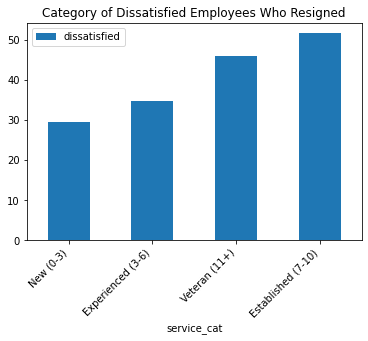

In [69]:
# Calculate the percentage of people who resigned
# due to dissatisfaction in each service category
dis_serv_pv = combined_updated2.pivot_table(values='dissatisfied', index='service_cat')

# Sort the categories index
dis_serv_pv.sort_values(by='dissatisfied', inplace=True)
dis_serv_pv['dissatisfied'] = dis_serv_pv['dissatisfied'] * 100

# Plot the results
dis_serv_pv.plot(kind='bar',
                 title='Category of Dissatisfied Employees Who Resigned')

# Align the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

**Observations**

- 30% of the new employees are likely to be resigned cause of dissatisfaction which is the least compared to other categories. It is understandable why their percentage is less because generally, new employees tend to seek work experience and are more willing to be patient with some dissatisfaction at the workplace.
- About 50% of the employees quit their job after spending 7-10 years of service. It is easier for established employees to make such decisions if they are not satisfied with their work environment. They are the highest in percentage among all other categories.
- Surprisingly, people who have worked more than 10 years are the second most dissatisfied employees (48%) who resigned. It would be interesting to investigate further.
- 34% of the experienced employees are the second least favorite to resign cause of dissatisfaction. 

### 2. Calculate the Percentage of Dissatisfied Employees per Age

We'll perform the same analysis as above. To remind ourselves, our next goal is:

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We'll compare dissatisfaction with `age` column.

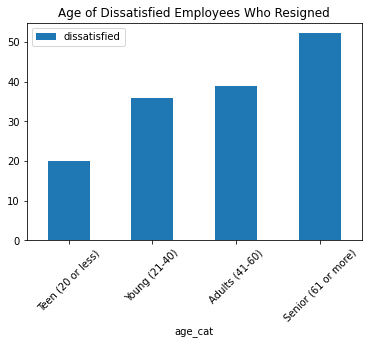

In [70]:
# Calculate the percentage of dissatisfied employees who resigned in each age group
dis_age_pv = combined_updated2.pivot_table(values='dissatisfied', index='age_cat')
dis_age_pv.sort_values(by='dissatisfied', inplace=True)
dis_age_pv['dissatisfied'] = dis_age_pv['dissatisfied'] * 100

# Plot the results
dis_age_pv.plot(kind='bar',
             rot=45,
             title='Age of Dissatisfied Employees Who Resigned')

plt.show()

**Observations**

- Seniors are more likely to be resigned due to dissatisfaction. Hence, they have the highest percentage compared to other age categories.
- It seems like teens are less likely to resign from the work cause of dissatisfaction.
- The general trend of the graph shows: there is an increase in the resignation of the dissatisfied employees as their age increases.

Next we'll move on to our final part of the project which is the data visualization.

## Data Visualization

In this section we'll make presentation of the results in `service_cat` and `age_cat`, founded in the Exploratory Data Analysis. In adding, we'll also visualize each of the survey result separately, for instance:

- Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

Let's begin with `service_cat`.

### 1. Visualizing the Dissatisfied People per Career Stage

In [71]:
# Set graph style
plt.style.use('fivethirtyeight')

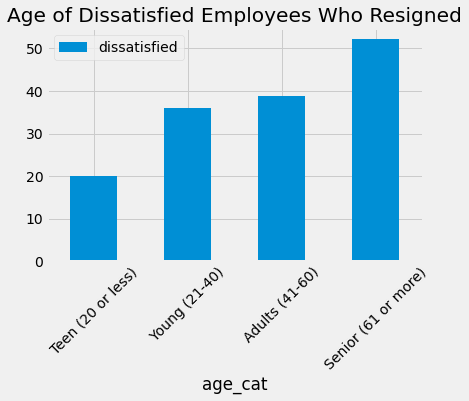

In [72]:
dis_age_pv.plot(kind='bar',
             rot=45,
             title='Age of Dissatisfied Employees Who Resigned')

plt.show()